In [6]:
import os
import re
import pandas as pd
import nltk
from nltk.tokenize import NLTKWordTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet

In [7]:
%config IOPub.data_rate_limit=9990000000000

In [8]:
#Defining the choice of stemmer
stemmer = PorterStemmer()

In [9]:
# Download NLTK stopwords data
nltk.download('stopwords')
nltk.download('punkt')

# Set up NLTK stopwords
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vasuk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vasuk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
import os
# Getting all text file locations
folder_path = r''
text = []

for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path, filename)
        text.append(file_path)

text

['C:\\Users\\vasuk\\OneDrive\\Desktop\\sql\\Articles\\NYT_2017_ISIS_1.txt',
 'C:\\Users\\vasuk\\OneDrive\\Desktop\\sql\\Articles\\NYT_2017_ISIS_10.txt',
 'C:\\Users\\vasuk\\OneDrive\\Desktop\\sql\\Articles\\NYT_2017_ISIS_11.txt',
 'C:\\Users\\vasuk\\OneDrive\\Desktop\\sql\\Articles\\NYT_2017_ISIS_12.txt',
 'C:\\Users\\vasuk\\OneDrive\\Desktop\\sql\\Articles\\NYT_2017_ISIS_2.txt',
 'C:\\Users\\vasuk\\OneDrive\\Desktop\\sql\\Articles\\NYT_2017_ISIS_3.txt',
 'C:\\Users\\vasuk\\OneDrive\\Desktop\\sql\\Articles\\NYT_2017_ISIS_4.txt',
 'C:\\Users\\vasuk\\OneDrive\\Desktop\\sql\\Articles\\NYT_2017_ISIS_5.txt',
 'C:\\Users\\vasuk\\OneDrive\\Desktop\\sql\\Articles\\NYT_2017_ISIS_6.txt',
 'C:\\Users\\vasuk\\OneDrive\\Desktop\\sql\\Articles\\NYT_2017_ISIS_7.txt',
 'C:\\Users\\vasuk\\OneDrive\\Desktop\\sql\\Articles\\NYT_2017_ISIS_8.txt',
 'C:\\Users\\vasuk\\OneDrive\\Desktop\\sql\\Articles\\NYT_2017_ISIS_9.txt',
 'C:\\Users\\vasuk\\OneDrive\\Desktop\\sql\\Articles\\WJ_2017_ISIS_ISIL_1.txt',
 'C:\

In [19]:
#Removing Metadata
import os

def remove_metadata(content):
    # Split content into lines
    lines = content.split('\n')

    # Identify and remove metadata lines
    metadata_prefixes = ['Title:', 'Author:', 'Date:']
    filtered_lines = [line for line in lines if not any(line.startswith(prefix) for prefix in metadata_prefixes)]

    # Join lines back into text
    cleaned_content = '\n'.join(filtered_lines)

    return cleaned_content

# List to store cleaned articles
cleaned_articles = []

folder_path = "C:\\Users\\vasuk\\OneDrive\\Desktop\\sql\\Articles"


# Specify the folder path for cleaned files
cleaned_folder_path = "C:\\Users\\vasuk\\OneDrive\\Desktop\\sql\\cleaned_folder"


# Create the cleaned folder if it doesn't exist
os.makedirs(cleaned_folder_path, exist_ok=True)

# Loop through each file in the folder path
for file_name in os.listdir(folder_path):
    if file_name.endswith('.txt'):
        file_path = os.path.join(folder_path, file_name)

        # Read the content of the file
        with open(file_path, 'r', encoding='utf-8') as file:
            article = file.read()

        # Remove metadata
        cleaned_article = remove_metadata(article)

        # Specify the path for the cleaned file
        cleaned_file_path = os.path.join(cleaned_folder_path, f"cleaned_{file_name}")

        # Save the cleaned article to a new file
        with open(cleaned_file_path, 'w', encoding='utf-8') as cleaned_file:
            cleaned_file.write(cleaned_article)

        print(f"Cleaned article saved to {cleaned_file_path}")





Cleaned article saved to C:\Users\vasuk\OneDrive\Desktop\sql\cleaned_folder\cleaned_NYT_2017_ISIS_1.txt
Cleaned article saved to C:\Users\vasuk\OneDrive\Desktop\sql\cleaned_folder\cleaned_NYT_2017_ISIS_10.txt
Cleaned article saved to C:\Users\vasuk\OneDrive\Desktop\sql\cleaned_folder\cleaned_NYT_2017_ISIS_11.txt
Cleaned article saved to C:\Users\vasuk\OneDrive\Desktop\sql\cleaned_folder\cleaned_NYT_2017_ISIS_12.txt
Cleaned article saved to C:\Users\vasuk\OneDrive\Desktop\sql\cleaned_folder\cleaned_NYT_2017_ISIS_2.txt
Cleaned article saved to C:\Users\vasuk\OneDrive\Desktop\sql\cleaned_folder\cleaned_NYT_2017_ISIS_3.txt
Cleaned article saved to C:\Users\vasuk\OneDrive\Desktop\sql\cleaned_folder\cleaned_NYT_2017_ISIS_4.txt
Cleaned article saved to C:\Users\vasuk\OneDrive\Desktop\sql\cleaned_folder\cleaned_NYT_2017_ISIS_5.txt
Cleaned article saved to C:\Users\vasuk\OneDrive\Desktop\sql\cleaned_folder\cleaned_NYT_2017_ISIS_6.txt
Cleaned article saved to C:\Users\vasuk\OneDrive\Desktop\sql\

In [58]:
import os
import re
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

# Download stopwords and initialize stemmer
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

file_path = "C:\\Users\\vasuk\\OneDrive\\Desktop\\sql\\cleaned_folder"
clean_stop_words = "C:\\Users\\vasuk\\OneDrive\\Desktop\\sql\\clean_stopwords"


def remove_stopwords_and_save(input_file_path, output_file_path, stop_words):
    with open(input_file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        words = re.findall(r'\b\w+\b', text)
        cleaned_words = [w for w in words if not w.lower() in stop_words]
        cleaned_text = ' '.join(cleaned_words)

        # Save the cleaned content to a new file
        with open(output_file_path, 'w', encoding='utf-8') as cleaned_file:
            cleaned_file.write(cleaned_text)

        print(f"Cleaned file saved to {output_file_path}")

        return cleaned_words

# Specify the folder path for your text files
folder_path = "C:\\Users\\vasuk\\OneDrive\\Desktop\\sql\\cleaned_folder"

# Specify the folder path for cleaned files
cleaned_folder_path = "C:\\Users\\vasuk\\OneDrive\\Desktop\\sql\\clean_stopwords"

# Create the cleaned folder if it doesn't exist
os.makedirs(clean_stop_words, exist_ok=True)

# Initialize word distribution counter
word_distribution = Counter()
original_word_distribution = Counter()
cleaned_word_distribution = Counter()

# Loop through each file in the folder path
for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        input_file_path = os.path.join(folder_path, filename)

        # Specify the path for the cleaned file
        output_file_path = os.path.join(cleaned_folder_path, f"stop_remove{filename}")

        # Remove stopwords and save the cleaned file
        cleaned_words = remove_stopwords_and_save(input_file_path, output_file_path, stop_words)

        # Update word distribution counter
        word_distribution.update(cleaned_words)
        
        #  # Read the content of the file
        with open(input_file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            original_words = re.findall(r'\b\w+\b', text)
            original_word_distribution.update(original_words)


Cleaned file saved to C:\Users\vasuk\OneDrive\Desktop\sql\clean_stopwords\stop_removecleaned_NYT_2017_ISIS_1.txt
Cleaned file saved to C:\Users\vasuk\OneDrive\Desktop\sql\clean_stopwords\stop_removecleaned_NYT_2017_ISIS_10.txt
Cleaned file saved to C:\Users\vasuk\OneDrive\Desktop\sql\clean_stopwords\stop_removecleaned_NYT_2017_ISIS_11.txt
Cleaned file saved to C:\Users\vasuk\OneDrive\Desktop\sql\clean_stopwords\stop_removecleaned_NYT_2017_ISIS_12.txt
Cleaned file saved to C:\Users\vasuk\OneDrive\Desktop\sql\clean_stopwords\stop_removecleaned_NYT_2017_ISIS_2.txt
Cleaned file saved to C:\Users\vasuk\OneDrive\Desktop\sql\clean_stopwords\stop_removecleaned_NYT_2017_ISIS_3.txt
Cleaned file saved to C:\Users\vasuk\OneDrive\Desktop\sql\clean_stopwords\stop_removecleaned_NYT_2017_ISIS_4.txt
Cleaned file saved to C:\Users\vasuk\OneDrive\Desktop\sql\clean_stopwords\stop_removecleaned_NYT_2017_ISIS_5.txt
Cleaned file saved to C:\Users\vasuk\OneDrive\Desktop\sql\clean_stopwords\stop_removecleaned_

In [61]:
print("Original Word Distribution before removing stop words:")
for word, count in original_word_distribution.most_common(30):
    print(f"{word}: {count}")
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming original_word_distribution is a Counter object containing word frequencies


Original Word Distribution before removing stop words:
the: 100372
to: 50701
of: 47684
and: 42665
a: 41651
in: 39798
that: 22990
on: 16150
for: 15363
The: 15206
is: 14618
s: 13973
was: 12347
with: 11710
said: 11658
he: 10708
it: 10539
as: 10295
Mr: 9916
from: 9193
by: 9185
have: 8928
I: 8037
at: 7980
an: 7879
has: 7602
his: 7534
Trump: 7439
are: 7232
be: 6716


C:\Users\vasuk\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
C:\Users\vasuk\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\vasuk\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\vasuk\AppData\Local\Programs\Python\Python310\lib\site-packages\w

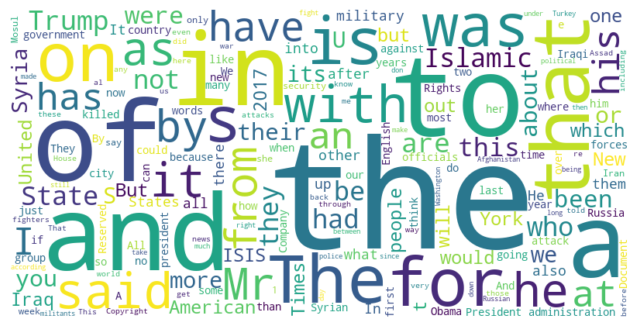

In [63]:
# word cloud for the above 

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(original_word_distribution)

# Plot the WordCloud image                        
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [64]:
# Print the cleaned word distribution in a vertical way
print("Cleaned Word Distribution after removing stop words:")
for word, count in word_distribution.most_common(30):
    print(f"{word}: {count}")    

Cleaned Word Distribution after removing stop words:
said: 11658
Mr: 9916
Trump: 7439
State: 6550
Islamic: 6356
U: 4339
Syria: 4137
American: 4036
New: 3986
would: 3945
people: 3893
2017: 3655
York: 3558
one: 3542
ISIS: 3536
Times: 3433
United: 3387
Iraq: 3205
military: 3202
also: 3057
States: 2976
government: 2662
forces: 2540
President: 2496
like: 2476
officials: 2334
group: 2316
Syrian: 2238
could: 2204
country: 2132


C:\Users\vasuk\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
C:\Users\vasuk\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\vasuk\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\vasuk\AppData\Local\Programs\Python\Python310\lib\site-packages\w

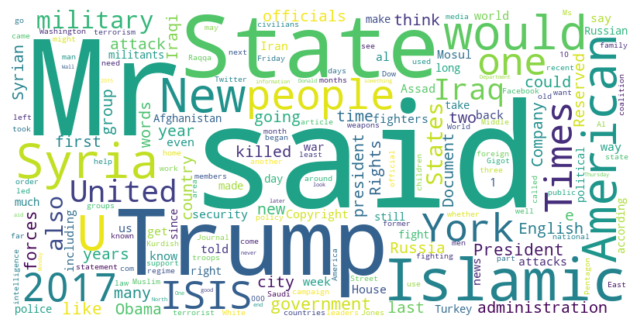

In [65]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_distribution)

# Plot the WordCloud image                        
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
import os
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
import string

# Download NLTK resources
import nltk
nltk.download('punkt')
nltk.download('wordnet')

# Function to preprocess text (lemmatization, tokenization, and removing punctuation)
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove punctuation
    tokens = [word for word in tokens if word.isalnum()]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Detokenize the processed tokens
    processed_text = TreebankWordDetokenizer().detokenize(tokens)

    return processed_text

# Specify the folder path for your text files
folder_path = "C:\\Users\\vasuk\\OneDrive\\Desktop\\sql\\clean_stopwords"

# Specify the folder path for cleaned files
processed_folder_path = "C:\\Users\\vasuk\\OneDrive\\Desktop\\sql\\lemmazation_token"

# Create the processed folder if it doesn't exist
os.makedirs(processed_folder_path, exist_ok=True)

# Loop through each file in the folder path
for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path, filename)

        # Read the content of the file
        with open(file_path, 'r', encoding='utf-8') as file:
            article = file.read()

        # Preprocess the article (lemmatization, tokenization, and removing punctuation)
        processed_article = preprocess_text(article)

        # Specify the path for the processed file
        processed_file_path = os.path.join(processed_folder_path, f"processed_{filename}")

        # Save the processed article to a new file
        with open(processed_file_path, 'w', encoding='utf-8') as processed_file:
            processed_file.write(processed_article)

        print(f"Processed article saved to {processed_file_path}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vasuk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vasuk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Processed article saved to C:\Users\vasuk\OneDrive\Desktop\sql\lemmazation_token\processed_stop_removecleaned_NYT_2017_ISIS_1.txt
Processed article saved to C:\Users\vasuk\OneDrive\Desktop\sql\lemmazation_token\processed_stop_removecleaned_NYT_2017_ISIS_10.txt
Processed article saved to C:\Users\vasuk\OneDrive\Desktop\sql\lemmazation_token\processed_stop_removecleaned_NYT_2017_ISIS_11.txt
Processed article saved to C:\Users\vasuk\OneDrive\Desktop\sql\lemmazation_token\processed_stop_removecleaned_NYT_2017_ISIS_12.txt
Processed article saved to C:\Users\vasuk\OneDrive\Desktop\sql\lemmazation_token\processed_stop_removecleaned_NYT_2017_ISIS_2.txt
Processed article saved to C:\Users\vasuk\OneDrive\Desktop\sql\lemmazation_token\processed_stop_removecleaned_NYT_2017_ISIS_3.txt
Processed article saved to C:\Users\vasuk\OneDrive\Desktop\sql\lemmazation_token\processed_stop_removecleaned_NYT_2017_ISIS_4.txt
Processed article saved to C:\Users\vasuk\OneDrive\Desktop\sql\lemmazation_token\proces

#### Extract features  

In [18]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re

# Download stopwords and initialize stemmer
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

# Function to preprocess text (remove stopwords and stem)
def preprocess_text(text):
    words = re.findall(r'\b\w+\b', text)
    words = [w for w in words if not w.lower() in stop_words]
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

# Specify the folder path for your text files
folder_path = "C:\\Users\\vasuk\\OneDrive\\Desktop\\sql\\lemmazation_token"

# Initialize a list to store preprocessed texts
preprocessed_texts = []

# Loop through each file in the folder path
for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path, filename)

        # Read the content of the file
        with open(file_path, 'r', encoding='utf-8') as file:
            article = file.read()

        # Preprocess the article (remove stopwords and stem)
        preprocessed_article = preprocess_text(article)
        preprocessed_texts.append(preprocessed_article)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the number of features

# Fit and transform the data
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_texts)

# Get the feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Print the feature names and TF-IDF matrix
print("Feature names (words):", feature_names)
print("\nTF-IDF Matrix:")
print(tfidf_matrix.toarray())


Feature names (words): ['00' '000' '01' ... 'zour' 'zucchino' 'zuckerberg']

TF-IDF Matrix:
[[0.         0.06259327 0.         ... 0.         0.         0.        ]
 [0.00327426 0.02290901 0.0017259  ... 0.01700158 0.         0.00144831]
 [0.00248443 0.03339081 0.0017461  ... 0.00688023 0.01507386 0.        ]
 ...
 [0.00469749 0.01693485 0.00198089 ... 0.         0.         0.00166229]
 [0.00193098 0.0242731  0.00152677 ... 0.00133688 0.         0.00085414]
 [0.00098035 0.029762   0.00258377 ... 0.         0.         0.        ]]


In [19]:
print(" Feature names (words):")
for word in feature_names:
    print(word)

 Feature names (words):
00
000
01
017
02
03
04
06
07
08
08trump
08voter
09
10
100
11
110
12
120
13
130
13769
14
15
150
16
17
18
180
19
1960s
1970s
1979
1980s
1990s
1991
19th
20
200
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
20th
21
22
23
24
25
250
26
27
28
29
30
300
31
32
33
34
35
350
36
360
37
38
39
40
400
41
42
43
44
45
450
46
47
48
49
50
500
51
52
53
54
55
56
57
58
59
60
600
64
65
70
700
75
750
80
800
84
85
86
90
900
95
a1
a10
a11
a17
a3
a4
a6
a8
a9
aaron
abaaoud
abadi
abandon
abba
abballa
abc
abdel
abdeslam
abduct
abdul
abdulla
abdullah
abdulrahim
abe
abedi
abi
abid
abil
abl
aboard
abort
aboutaam
abouyaaqoub
abraham
abroad
abrupt
absenc
absolut
absorb
absurd
abu
abus
academ
academi
acceler
accept
access
accid
accident
accommod
accompani
accomplic
accomplish
accord
account
accur
accus
accustom
achiev
achin
ackerman
acknowledg
acquir
acquisit
acronym
across
act
action
activ
activist
actor
actress
actual
acut
ad
adam
adapt
add
addict

In [22]:
import numpy as np
tfidf_statistics = {
    'Feature': feature_names,
    'Mean TF-IDF': np.mean(tfidf_matrix.toarray(), axis=0),
    'Max TF-IDF': np.max(tfidf_matrix.toarray(), axis=0),
    'Min TF-IDF': np.min(tfidf_matrix.toarray(), axis=0)
}

# Convert the summary to a pandas DataFrame for better display
import pandas as pd
df_tfidf_statistics = pd.DataFrame(tfidf_statistics)

# Display the summary
print(df_tfidf_statistics.head(20))

    Feature  Mean TF-IDF  Max TF-IDF  Min TF-IDF
0        00     0.002601    0.004697    0.000000
1       000     0.026253    0.062593    0.005559
2        01     0.003590    0.032005    0.000000
3       017     0.003660    0.008848    0.000000
4        02     0.002068    0.007443    0.000000
5        03     0.001518    0.006672    0.000000
6        04     0.001073    0.005210    0.000000
7        06     0.001334    0.004633    0.000000
8        07     0.000665    0.001723    0.000000
9        08     0.001381    0.013398    0.000000
10  08trump     0.001694    0.030488    0.000000
11  08voter     0.001694    0.030488    0.000000
12       09     0.001230    0.003727    0.000000
13       10     0.018911    0.033905    0.009050
14      100     0.007735    0.018256    0.001390
15       11     0.015186    0.021837    0.007237
16      110     0.000769    0.003499    0.000000
17       12     0.008709    0.015158    0.002224
18      120     0.001609    0.008860    0.000000
19       13     0.00

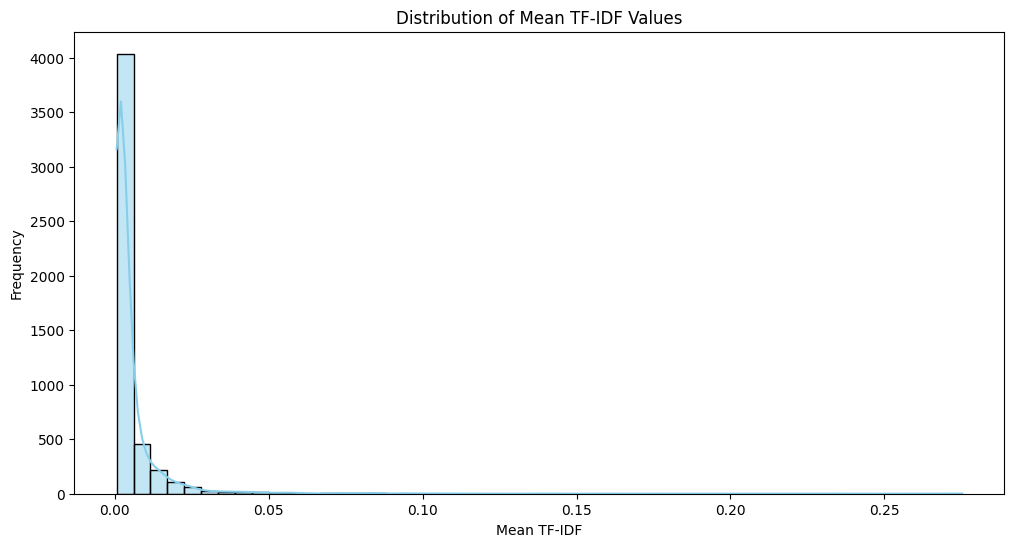

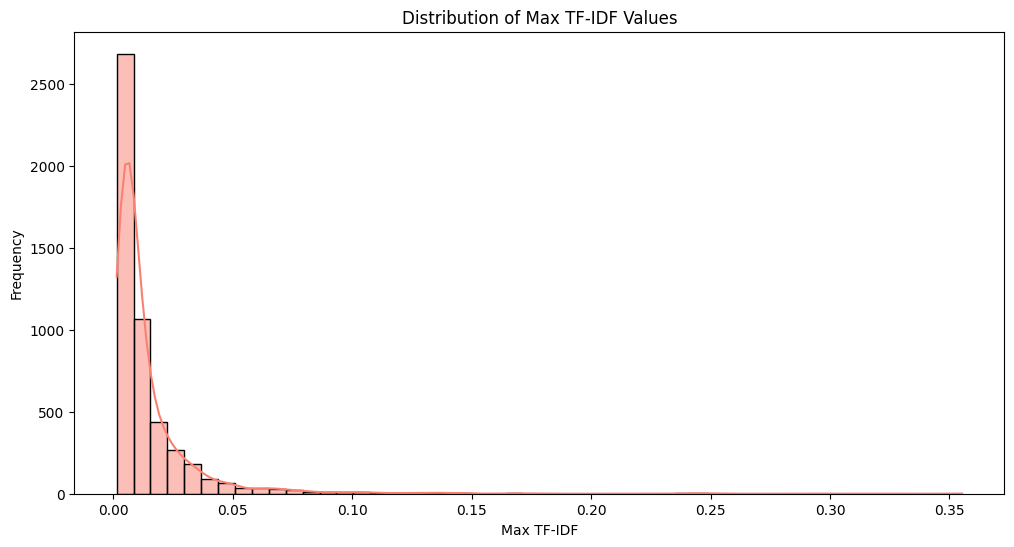

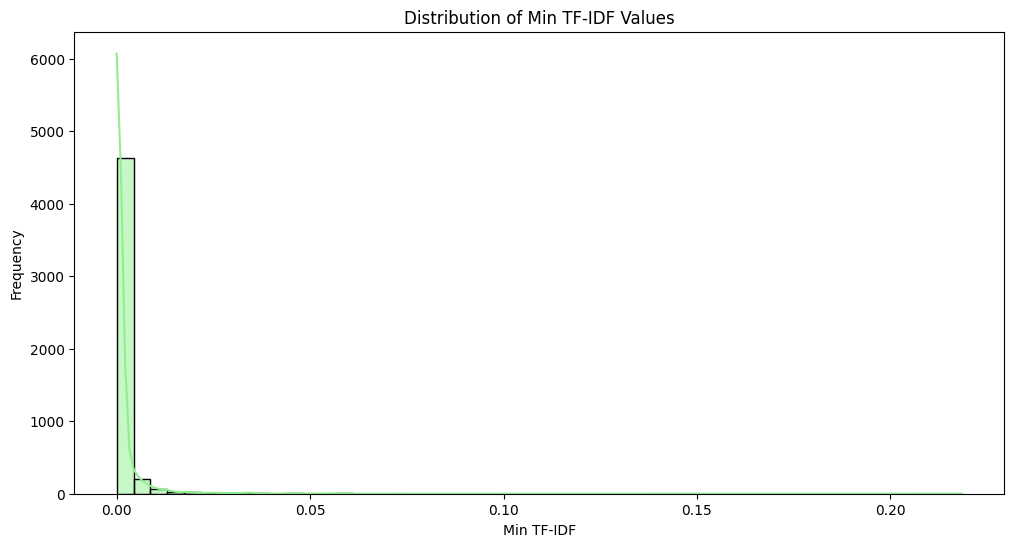

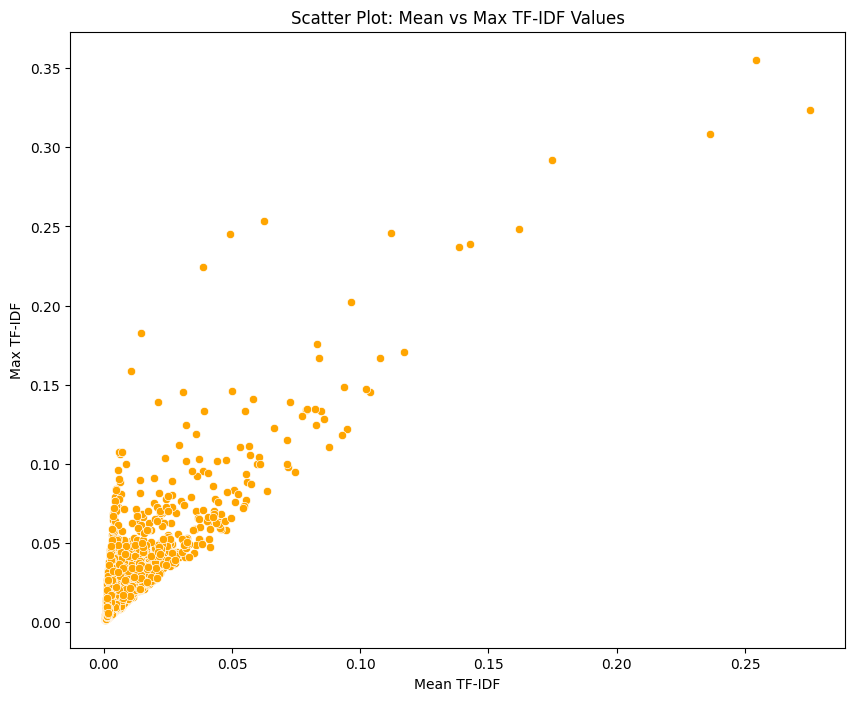

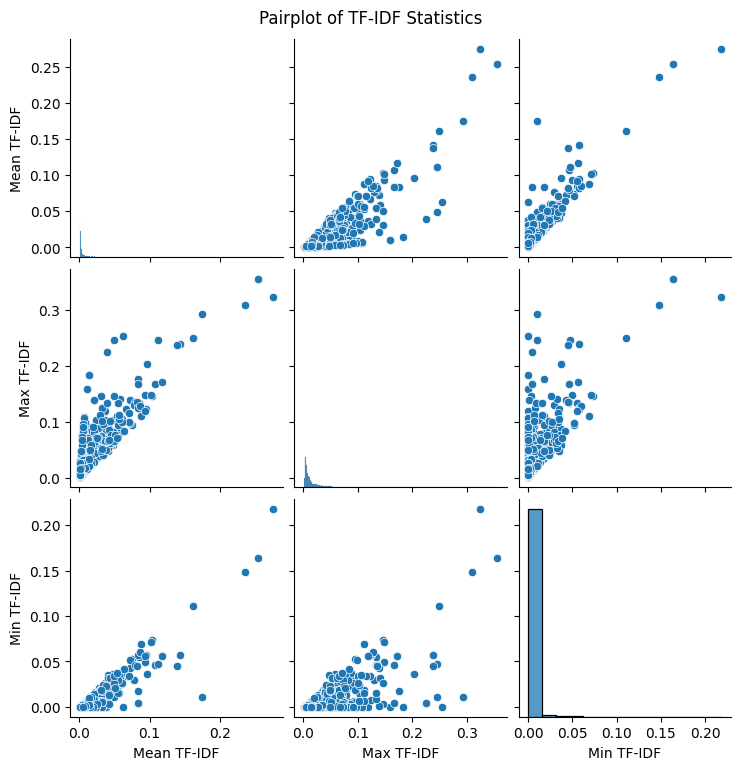

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the df_tfidf_statistics DataFrame from the previous code

# Plot the distribution of mean TF-IDF values
plt.figure(figsize=(12, 6))
sns.histplot(df_tfidf_statistics['Mean TF-IDF'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Mean TF-IDF Values')
plt.xlabel('Mean TF-IDF')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of max TF-IDF values
plt.figure(figsize=(12, 6))
sns.histplot(df_tfidf_statistics['Max TF-IDF'], bins=50, kde=True, color='salmon')
plt.title('Distribution of Max TF-IDF Values')
plt.xlabel('Max TF-IDF')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of min TF-IDF values
plt.figure(figsize=(12, 6))
sns.histplot(df_tfidf_statistics['Min TF-IDF'], bins=50, kde=True, color='lightgreen')
plt.title('Distribution of Min TF-IDF Values')
plt.xlabel('Min TF-IDF')
plt.ylabel('Frequency')
plt.show()

# Scatter plot between mean and max TF-IDF values
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_tfidf_statistics, x='Mean TF-IDF', y='Max TF-IDF', color='orange')
plt.title('Scatter Plot: Mean vs Max TF-IDF Values')
plt.xlabel('Mean TF-IDF')
plt.ylabel('Max TF-IDF')
plt.show()

# Pairplot for mean, max, and min TF-IDF values
sns.pairplot(df_tfidf_statistics[['Mean TF-IDF', 'Max TF-IDF', 'Min TF-IDF']])
plt.suptitle('Pairplot of TF-IDF Statistics', y=1.02)
plt.show()


### Topic modeling

#### using LDA 

In [1]:
pip install gensim


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
from gensim import corpora, models
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re


In [28]:
import os
import gensim
from gensim.utils import simple_preprocess


def read_files_from_folder(folder_path):
    all_data = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.txt'):
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read()
                all_data.append(content)
    return all_data

def sent_to_words(sentences):
    for sentence in sentences:
        yield simple_preprocess(str(sentence), deacc=True)

# Specify the folder path for your text files
folder_path = "C:\\Users\\vasuk\\OneDrive\\Desktop\\sql\\lemmazation_token"

# Read data from all files in the folder
data = read_files_from_folder(folder_path)

# Preprocess the data into words
data_words = list(sent_to_words(data))

# Print the preprocessed words for the first document
print(data_words[:1])


[['world', 'europe', 'turkey', 'hand', 'seen', 'nearly', 'every', 'crisis', 'tim', 'arango', 'word', 'january', 'nytimes', 'com', 'feed', 'nytfeed', 'english', 'copyright', 'new', 'york', 'times', 'company', 'rights', 'reserved', 'istanbul', 'urkish', 'official', 'accused', 'united', 'states', 'abetting', 'failed', 'coup', 'last', 'summer', 'russian', 'ambassador', 'turkey', 'assassinated', 'last', 'month', 'turkish', 'press', 'said', 'united', 'states', 'behind', 'attack', 'gunman', 'walked', 'istanbul', 'nightclub', 'early', 'new', 'year', 'day', 'killed', 'dozen', 'pro', 'government', 'news', 'medium', 'pointed', 'finger', 'united', 'states', 'merica', 'chief', 'suspect', 'ne', 'headline', 'blared', 'attack', 'twitter', 'turkish', 'lawmaker', 'referring', 'name', 'nightclub', 'wrote', 'hoever', 'triggerman', 'reina', 'attack', 'act', 'cia', 'period', 'turkey', 'confronted', 'cascade', 'crisis', 'seem', 'accelerated', 'syrian', 'civil', 'war', 'spilled', 'across', 'border', 'event', 

In [29]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['world', 'europe', 'turkey', 'hand', 'seen', 'nearly', 'every', 'crisis', 'tim_arango', 'word_january_nytimes', 'com_feed_nytfeed_english', 'copyright', 'new_york_times', 'company_rights_reserved', 'istanbul', 'urkish', 'official', 'accused_united_states', 'abetting', 'failed_coup', 'last', 'summer', 'russian', 'ambassador', 'turkey', 'assassinated', 'last', 'month', 'turkish', 'press', 'said_united_states', 'behind', 'attack', 'gunman', 'walked', 'istanbul_nightclub', 'early', 'new', 'year', 'day', 'killed', 'dozen', 'pro', 'government', 'news', 'medium', 'pointed', 'finger', 'united_states', 'merica', 'chief', 'suspect', 'ne', 'headline', 'blared', 'attack', 'twitter', 'turkish', 'lawmaker', 'referring', 'name', 'nightclub', 'wrote', 'hoever', 'triggerman', 'reina', 'attack', 'act', 'cia', 'period', 'turkey', 'confronted', 'cascade', 'crisis', 'seem', 'accelerated', 'syrian', 'civil_war', 'spilled', 'across', 'border', 'event', 'pushed', 'turkey', 'closer', 'nato_ally', 'conversely'

In [30]:
# Define function for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [35]:
!!pip install spacy

['Requirement already satisfied: spacy in c:\\users\\vasuk\\appdata\\local\\programs\\python\\python310\\lib\\site-packages (3.7.2)',
 'Requirement already satisfied: spacy-loggers<2.0.0,>=1.0.0 in c:\\users\\vasuk\\appdata\\local\\programs\\python\\python310\\lib\\site-packages (from spacy) (1.0.5)',
 'Requirement already satisfied: murmurhash<1.1.0,>=0.28.0 in c:\\users\\vasuk\\appdata\\local\\programs\\python\\python310\\lib\\site-packages (from spacy) (1.0.10)',
 'Requirement already satisfied: numpy>=1.19.0 in c:\\users\\vasuk\\appdata\\local\\programs\\python\\python310\\lib\\site-packages (from spacy) (1.26.2)',
 'Requirement already satisfied: jinja2 in c:\\users\\vasuk\\appdata\\local\\programs\\python\\python310\\lib\\site-packages (from spacy) (3.1.2)',
 'Requirement already satisfied: catalogue<2.1.0,>=2.0.6 in c:\\users\\vasuk\\appdata\\local\\programs\\python\\python310\\lib\\site-packages (from spacy) (2.0.10)',
 'Requirement already satisfied: wasabi<1.2.0,>=0.9.1 in c:

In [38]:
import spacy

# Assuming you have functions make_bigrams and lemmatization defined

# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# Make sure you have downloaded the spaCy English model
# !python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Define the lemmatization function
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """
    Perform lemmatization on the texts, keeping only specified POS tags.
    """
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])


[['hand', 'see', 'nearly', 'crisis', 'word', 'com_fee', 'nytfeed_english', 'copyright', 'new', 'york_time', 'company_right', 'reserve', 'istanbul', 'urkish', 'official', 'accuse', 'united_state', 'abet', 'failed_coup', 'last', 'summer', 'russian', 'ambassador', 'assassinate', 'last', 'month', 'turkish', 'say', 'united_state', 'attack', 'gunman', 'walk', 'istanbul_nightclub', 'early', 'new', 'year', 'day', 'kill', 'dozen', 'pro', 'government', 'news', 'medium', 'point', 'finger', 'united_state', 'merica', 'blare', 'attack', 'twitter', 'turkish', 'lawmaker', 'refer', 'name', 'nightclub', 'write', 'period', 'turkey', 'confront', 'cascade', 'crisis', 'seem', 'accelerate', 'syrian', 'civil_war', 'spill', 'border', 'event', 'push', 'turkey', 'close', 'nato_ally', 'conversely', 'drift', 'move', 'close', 'work', 'russian', 'president', 'secure', 'cease_fire', 'syria', 'story', 'turkish', 'press', 'base', 'routine', 'travel', 'warning', 'issue', 'american', 'embassy', 'turkey', 'united_state', 

In [39]:
# Create Dictionary 
id2word = corpora.Dictionary(data_lemmatized)  
# Create Corpus 
texts = data_lemmatized  
# Term Document Frequency 
corpus = [id2word.doc2bow(text) for text in texts]  

In [40]:
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 2),
  (5, 1),
  (6, 4),
  (7, 1),
  (8, 3),
  (9, 1),
  (10, 1),
  (11, 2),
  (12, 1),
  (13, 1),
  (14, 5),
  (15, 3),
  (16, 2),
  (17, 19),
  (18, 1),
  (19, 1),
  (20, 2),
  (21, 4),
  (22, 2),
  (23, 6),
  (24, 2),
  (25, 1),
  (26, 1),
  (27, 3),
  (28, 2),
  (29, 2),
  (30, 2),
  (31, 11),
  (32, 6),
  (33, 2),
  (34, 3),
  (35, 2),
  (36, 1),
  (37, 1),
  (38, 2),
  (39, 2),
  (40, 8),
  (41, 2),
  (42, 2),
  (43, 10),
  (44, 1),
  (45, 2),
  (46, 1),
  (47, 3),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 2),
  (53, 8),
  (54, 7),
  (55, 13),
  (56, 4),
  (57, 2),
  (58, 4),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 8),
  (63, 1),
  (64, 1),
  (65, 7),
  (66, 2),
  (67, 2),
  (68, 4),
  (69, 20),
  (70, 2),
  (71, 1),
  (72, 4),
  (73, 1),
  (74, 2),
  (75, 2),
  (76, 30),
  (77, 4),
  (78, 1),
  (79, 1),
  (80, 2),
  (81, 2),
  (82, 5),
  (83, 2),
  (84, 1),
  (85, 1),
  (86, 2),
  (87, 1),
  (88, 1),
  (89, 2),
  (90, 1),
  (

In [41]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('abduct', 1),
  ('abduction', 1),
  ('abet', 1),
  ('ability', 1),
  ('able', 2),
  ('abort', 1),
  ('abortion', 4),
  ('abroad', 1),
  ('abstinence', 3),
  ('absurd', 1),
  ('absurdity', 1),
  ('abuse', 2),
  ('abuser', 1),
  ('academic', 1),
  ('accelerate', 5),
  ('accept', 3),
  ('acceptance', 2),
  ('accord', 19),
  ('account', 1),
  ('accumulate', 1),
  ('accusation', 2),
  ('accuse', 4),
  ('achieve', 2),
  ('acknowledge', 6),
  ('acronym', 2),
  ('act', 1),
  ('activist', 1),
  ('actor', 3),
  ('actual', 2),
  ('actually', 2),
  ('ad', 2),
  ('add', 11),
  ('additional', 6),
  ('address', 2),
  ('administration', 3),
  ('admiral', 2),
  ('adopt', 1),
  ('advance', 1),
  ('advanced', 2),
  ('advise', 2),
  ('adviser', 8),
  ('affinity', 2),
  ('afford', 2),
  ('afghan', 10),
  ('african', 1),
  ('afterglow', 2),
  ('aftermath', 1),
  ('age', 3),
  ('aged', 1),
  ('agenda', 1),
  ('aggressive', 1),
  ('aggressively', 1),
  ('ago', 2),
  ('agree', 8),
  ('agreement', 7),
  ('ai

### build LDA model 

In [42]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=16, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)


In [45]:
from pprint import pprint

In [46]:
# Extract topics
# Print the keyword of topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


[(0,
  '0.004*"say" + 0.002*"attack" + 0.002*"state" + 0.002*"new" + '
  '0.001*"islamic" + 0.001*"trump" + 0.001*"group" + 0.001*"go" + '
  '0.001*"people" + 0.001*"isis"'),
 (1,
  '0.002*"say" + 0.001*"state" + 0.001*"new" + 0.001*"isis" + 0.001*"group" + '
  '0.001*"trump" + 0.001*"year" + 0.001*"islamic" + 0.001*"people" + '
  '0.001*"official"'),
 (2,
  '0.003*"say" + 0.002*"state" + 0.001*"islamic" + 0.001*"attack" + '
  '0.001*"new" + 0.001*"people" + 0.001*"make" + 0.001*"trump" + '
  '0.001*"military" + 0.001*"year"'),
 (3,
  '0.017*"say" + 0.010*"new" + 0.006*"york_time" + 0.006*"state" + '
  '0.005*"year" + 0.005*"islamic" + 0.005*"people" + 0.005*"isis" + '
  '0.004*"take" + 0.004*"time"'),
 (4,
  '0.005*"say" + 0.001*"new" + 0.001*"trump" + 0.001*"attack" + 0.001*"state" '
  '+ 0.001*"year" + 0.001*"kill" + 0.001*"military" + 0.001*"force" + '
  '0.001*"last"'),
 (5,
  '0.019*"say" + 0.008*"state" + 0.008*"new" + 0.006*"islamic" + '
  '0.005*"people" + 0.005*"kill" + 0.005

### evaluation 

In [47]:
from pprint import pprint
from gensim.models import CoherenceModel

# Compute Perplexity
perplexity = lda_model.log_perplexity(corpus)
print('\nPerplexity: {:.4f}'.format(perplexity))
# Perplexity is a measure of how good the model is; lower values are better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: {:.4f}'.format(coherence_lda))
# Coherence Score measures the degree of semantic similarity between topics; higher values are better.

# Optional: Pretty print the topic-word distributions
if input("Do you want to print the topic-word distributions? (yes/no): ").lower() == 'yes':
    print('\nTopic-Word Distributions:')
    pprint(lda_model.print_topics())

# Optional: Pretty print the document-topic distributions for a sample document
sample_document_index = 0
if input("Do you want to print the document-topic distribution for a sample document? (yes/no): ").lower() == 'yes':
    sample_document = data_lemmatized[sample_document_index]
    print('\nDocument-Topic Distribution for Sample Document:')
    pprint(lda_model.get_document_topics(id2word.doc2bow(sample_document)))



Perplexity: -8.1398
Coherence Score: 0.2874
Do you want to print the topic-word distributions? (yes/no): yes

Topic-Word Distributions:
[(0,
  '0.004*"say" + 0.002*"attack" + 0.002*"state" + 0.002*"new" + '
  '0.001*"islamic" + 0.001*"trump" + 0.001*"group" + 0.001*"go" + '
  '0.001*"people" + 0.001*"isis"'),
 (1,
  '0.002*"say" + 0.001*"state" + 0.001*"new" + 0.001*"isis" + 0.001*"group" + '
  '0.001*"trump" + 0.001*"year" + 0.001*"islamic" + 0.001*"people" + '
  '0.001*"official"'),
 (2,
  '0.003*"say" + 0.002*"state" + 0.001*"islamic" + 0.001*"attack" + '
  '0.001*"new" + 0.001*"people" + 0.001*"make" + 0.001*"trump" + '
  '0.001*"military" + 0.001*"year"'),
 (3,
  '0.017*"say" + 0.010*"new" + 0.006*"york_time" + 0.006*"state" + '
  '0.005*"year" + 0.005*"islamic" + 0.005*"people" + 0.005*"isis" + '
  '0.004*"take" + 0.004*"time"'),
 (4,
  '0.005*"say" + 0.001*"new" + 0.001*"trump" + 0.001*"attack" + 0.001*"state" '
  '+ 0.001*"year" + 0.001*"kill" + 0.001*"military" + 0.001*"force

#### visualize the topic   

In [49]:
pip install pyldavis


  Using cached pyLDAvis-3.4.1-py3-none-any.whl (2.6 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Enable notebook display for PyLDAvis
pyLDAvis.enable_notebook()

# Prepare the visualization
vis_data = gensimvis.prepare(lda_model, corpus, id2word)

# Display the visualization
pyLDAvis.display(vis_data)


### Finding best number of topic 

In [51]:
import gensim
from gensim.models import CoherenceModel

# Build LDA models for a range of topics
min_topics = 15
max_topics = 25
Result = []

for num_topics in range(min_topics, max_topics + 1):
    lda_model = gensim.models.LdaModel(
        corpus=corpus,
        id2word=id2word,
        num_topics=num_topics,
        random_state=100,
        update_every=1,
        chunksize=100,
        passes=10,
        alpha='auto',
        per_word_topics=True
    )
    
    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(
        model=lda_model,
        texts=data_lemmatized,
        dictionary=id2word,
        coherence='c_v'
    )
    coherence_lda = coherence_model_lda.get_coherence()
    
    Result.append([num_topics, lda_model.log_perplexity(corpus), coherence_lda])

# Print the results
for result in Result:
    print(f"Topics: {result[0]}, Perplexity: {result[1]}, Coherence: {result[2]}")


Topics: 15, Perplexity: -8.105811140544507, Coherence: 0.29012471518529387
Topics: 16, Perplexity: -8.139787802828057, Coherence: 0.28741783027736134
Topics: 17, Perplexity: -8.163150892177173, Coherence: 0.2947393745440198
Topics: 18, Perplexity: -8.203769895066795, Coherence: 0.29259342300264746
Topics: 19, Perplexity: -8.172781334344055, Coherence: 0.286031014039212
Topics: 20, Perplexity: -8.206285860378498, Coherence: 0.28451333951232455
Topics: 21, Perplexity: -8.220168912106534, Coherence: 0.28500111957526986
Topics: 22, Perplexity: -8.252785804400906, Coherence: 0.2890698492959381
Topics: 23, Perplexity: -8.262935852282872, Coherence: 0.28529392455017333
Topics: 24, Perplexity: -8.271720674847007, Coherence: 0.28535263567238917
Topics: 25, Perplexity: -8.307628661608444, Coherence: 0.2917818717580212


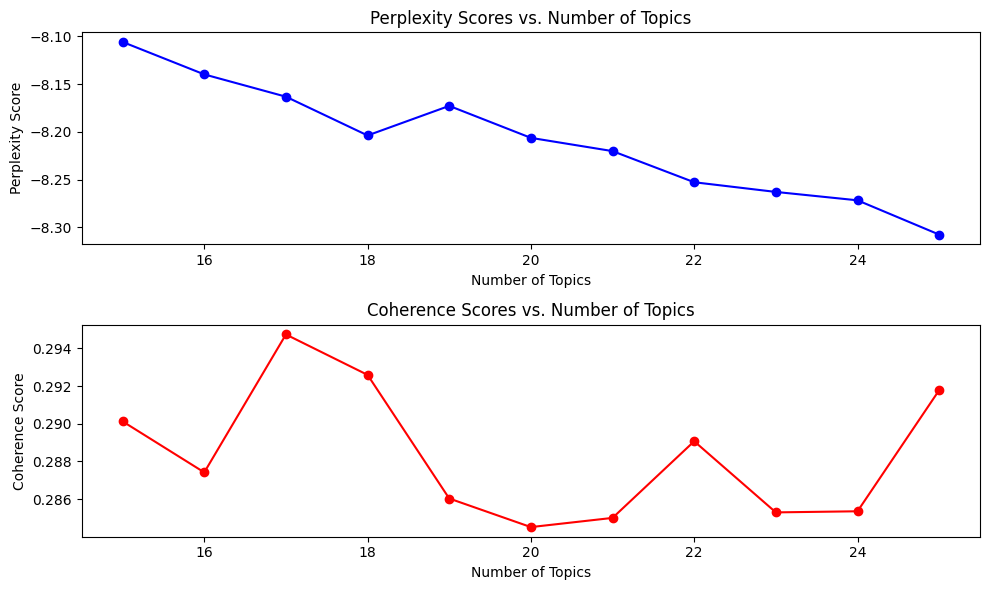

In [52]:
import matplotlib.pyplot as plt

# Extract the data from the Result list
num_topics = [result[0] for result in Result]
perplexity_scores = [result[1] for result in Result]
coherence_scores = [result[2] for result in Result]

# Plot the coherence scores against the number of topics
plt.figure(figsize=(10, 6))

# Plotting Perplexity Scores
plt.subplot(2, 1, 1)
plt.plot(num_topics, perplexity_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity Score')
plt.title('Perplexity Scores vs. Number of Topics')

# Plotting Coherence Scores
plt.subplot(2, 1, 2)
plt.plot(num_topics, coherence_scores, marker='o', linestyle='-', color='r')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Scores vs. Number of Topics')

plt.tight_layout()
plt.show()


In [ ]:
# The maximum coherence score at num_of_topics is 17

#### Building model with coherence score = 17 

In [53]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=17, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)


In [54]:
# Extract topics
# Print the keyword of topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.005*"say" + 0.003*"attack" + 0.002*"state" + 0.002*"new" + '
  '0.002*"islamic" + 0.002*"trump" + 0.002*"group" + 0.002*"go" + '
  '0.001*"people" + 0.001*"isis"'),
 (1,
  '0.002*"say" + 0.001*"state" + 0.001*"new" + 0.001*"trump" + 0.001*"group" + '
  '0.001*"isis" + 0.001*"year" + 0.001*"islamic" + 0.001*"people" + '
  '0.001*"official"'),
 (2,
  '0.003*"say" + 0.002*"state" + 0.001*"islamic" + 0.001*"attack" + '
  '0.001*"new" + 0.001*"people" + 0.001*"make" + 0.001*"trump" + '
  '0.001*"military" + 0.001*"year"'),
 (3,
  '0.020*"say" + 0.008*"state" + 0.008*"new" + 0.007*"islamic" + '
  '0.006*"york_time" + 0.005*"group" + 0.005*"year" + 0.005*"attack" + '
  '0.005*"people" + 0.005*"government"'),
 (4,
  '0.005*"say" + 0.002*"trump" + 0.002*"attack" + 0.001*"new" + '
  '0.001*"military" + 0.001*"state" + 0.001*"year" + 0.001*"kill" + '
  '0.001*"force" + 0.001*"go"'),
 (5,
  '0.017*"say" + 0.009*"new" + 0.006*"state" + 0.006*"york_time" + '
  '0.006*"year" + 0.005*"people

### Evaluation 

In [55]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
# a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.163150892177173

Coherence Score:  0.2947393745440198


### Visualization 

In [56]:
# Enable notebook display for PyLDAvis
pyLDAvis.enable_notebook()

# Prepare the visualization
vis_data = gensimvis.prepare(lda_model, corpus, id2word)

# Display the visualization
pyLDAvis.display(vis_data)
